# Heat Transfer Simulation

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
# import pandas as pd
import numpy as np
import mpl_toolkits.mplot3d
import ipywidgets as widgets

mpl.rcParams["figure.figsize"] = (4, 4)
mpl.rcParams["figure.dpi"] = 200

\begin{align}
    {\partial u \over \partial t} = \alpha \left({\partial^2 u \over \partial x^2} + {\partial^2 u \over \partial y^2} + {\partial^2 u \over \partial z^2}\right)
\end{align}

In [11]:
import gc
gc.collect()

154744

## 参数

\begin{align}
    & && \alpha \\
    & {\rm 纯P} && 0.18 \\
    & {\rm Fe_3 O_4} && 7 \\
    & {\rm Ni} && 90 \\
    & {\rm Ba Ti O_3} && 6.2 \\
\end{align}

## 二维热传导

### 二段热传导

1. 左下角无限热源，维持$200 \,{}^\circ$，维持一段时间
1. 再撤去热源，上右两边无限热源，维持$25 \,{}^\circ$，维持一段时间

In [3]:
import scipy.integrate

In [6]:
# X = np.linspace(0, 100e-6, 101)
# Y = np.linspace(0, 100e-6, 101)

# X, Y = np.meshgrid(X, Y)
la = 10e-3 # axis 0 physical length
lb = 10e-3 # axis 1 physical length
lc = 1e-3 # axis 2 physical length
t0 = 0 # initial time
t1 = 3e-4 # endpoint time

def f(t, y):
    y = y.reshape(101, 101)
#     y[0, :] = 25
#     y[-1, :] = 25
#     y[:, 0] = 25
#     y[:, -1] = 25
    y[0, 0] = 200
    df_dx, df_dy = np.gradient(y, la / 101)
    d2f_dx2 = np.gradient(df_dx, lb / 101)[0]
    d2f_dy2 = np.gradient(df_dy, la / 101)[1]
    return (0.18 * (d2f_dx2 + d2f_dy2)).flatten()

y0 = np.ones((101, 101)) * 25
# y0[0, :] = 25
# y0[-1, :] = 25
# y0[:, 0] = 25
# y0[:, -1] = 25
y0[0, 0] = 200
y0 = y0.flatten()

sol1 = scipy.integrate.solve_ivp(f, [t0, t1], y0, dense_output=True, method="RK23")
# sol1 = scipy.integrate.solve_ivp(f, [0, 3e-6], y0, t_eval=np.linspace(0, 3e-6, 100), dense_output=True, method="RK23")
# sol = scipy.integrate.solve_ivp(f, [0, 1e-5], y0, dense_output=True)
sol1

  message: 'The solver successfully reached the interval end.'
     nfev: 17162
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f2ba9ac5d68>
   status: 0
  success: True
        t: array([0.00000000e+00, 3.76109519e-08, 9.69251105e-08, ...,
       2.99928258e-04, 2.99989343e-04, 3.00000000e-04])
 t_events: None
        y: array([[200.        , 200.        , 200.        , ..., 200.        ,
        200.        , 200.        ],
       [ 25.        ,  77.20933909, 127.70906544, ..., 199.73858853,
        199.74093685, 199.74072564],
       [ 25.        ,  53.56280245,  87.77595578, ..., 199.48085856,
        199.47964284, 199.47994421],
       ...,
       [ 25.        ,  25.        ,  25.        , ..., 125.36247236,
        125.38666985, 125.39144908],
       [ 25.        ,  25.        ,  25.        , ..., 125.33687344,
        125.3648386 , 125.36915771],
       [ 25.        ,  25.        ,  25.        , ..., 125.33687343,
        125.3648386 , 

In [7]:
def interactivePlot(p):
    plt.imshow(sol1.sol(p * t1).reshape(101, 101), origin="lower", cmap="jet")
    plt.clim(25, 200)
    plt.title(r"$t = %g \,{\rm s}$"%(t * t1))
    plt.colorbar()

# values = np.linspace(0, 1, 1000)
slider = widgets.FloatSlider(min=0, max=1, step=1 / 1000, continuous_update=False)
widgets.interact(interactivePlot, p = slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=1.0, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

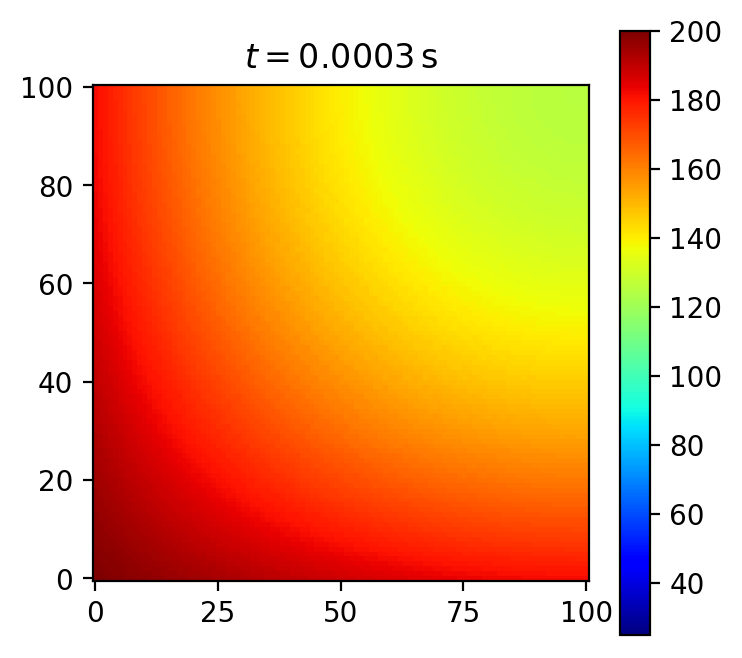

In [9]:
for p in np.linspace(0, 1, 30):
    plt.close()
    interactivePlot(p)
    plt.savefig("heat-2-stages/stage1/" + "%d"%(p * 30), format="png")

用
```bash
convert $(ls | sort -n) animated.gif
```
可以生成`.gif`动图。

![](heat-2-stages/stage1/animated.gif)

In [10]:
y0 = sol1.sol(sol1.sol.t_max)
y0

array([199.99963767, 199.74072564, 199.47994421, ..., 125.39144908,
       125.36915771, 125.36915771])

In [15]:
# X = np.linspace(0, 100e-6, 101)
# Y = np.linspace(0, 100e-6, 101)

# X, Y = np.meshgrid(X, Y)
la = 10e-3 # axis 0 physical length
lb = 10e-3 # axis 1 physical length
lc = 1e-3 # axis 2 physical length
t0 = 0 # initial time
t1 = 3e-5 # endpoint time

def f(t, y):
    y = y.reshape(101, 101)
#     y[0] = 200
#     y[-1] = 0
#     y[:, 0] = 200
    y[:, -1] = 25
#     y[0, :] = 25
    y[-1, :] = 25
#     y[:, 0] = 25
    df_dx, df_dy = np.gradient(y, la / 101)
    d2f_dx2 = np.gradient(df_dx, la / 101)[0]
    d2f_dy2 = np.gradient(df_dy, la / 101)[1]
    return (0.18 * (d2f_dx2 + d2f_dy2)).flatten()

y0 = y0.flatten()

sol2 = scipy.integrate.solve_ivp(f, [t0, t1], y0, dense_output=True)
# sol = scipy.integrate.solve_ivp(f, [0, 1e-5], y0, dense_output=True)
sol2

  message: 'The solver successfully reached the interval end.'
     nfev: 2492
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f2ba9352ef0>
   status: 0
  success: True
        t: array([0.00000000e+00, 5.48844994e-08, 1.18046833e-07, 1.96387989e-07,
       2.92456931e-07, 4.12964709e-07, 5.11184078e-07, 6.15453106e-07,
       6.95760261e-07, 7.79645947e-07, 8.75877077e-07, 9.79170520e-07,
       1.05970007e-06, 1.14367929e-06, 1.23920209e-06, 1.34124393e-06,
       1.42221091e-06, 1.50641046e-06, 1.60142015e-06, 1.70252039e-06,
       1.78397690e-06, 1.86847311e-06, 1.96309680e-06, 2.06338520e-06,
       2.14531127e-06, 2.23009843e-06, 2.32440197e-06, 2.42399577e-06,
       2.50636136e-06, 2.59142722e-06, 2.68545787e-06, 2.78444233e-06,
       2.86721482e-06, 2.95254156e-06, 3.04633340e-06, 3.14477710e-06,
       3.22792585e-06, 3.31349543e-06, 3.40707477e-06, 3.50503346e-06,
       3.58853053e-06, 3.67432589e-06, 3.76771375e-06, 3.86523356e-

In [17]:
def interactivePlot(p):
    plt.imshow(sol2.sol(p * t1).reshape(101, 101), origin="lower", cmap="jet")
    plt.clim(25, 200)
    plt.title(r"$t' = %g \,{\rm s}$"%(p * t1))
    plt.colorbar()

# values = np.linspace(0, 1, 1000)
slider = widgets.FloatSlider(min=0, max=1, step=1 / 1000, continuous_update=False)
widgets.interact(interactivePlot, p = slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='p', max=1.0, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

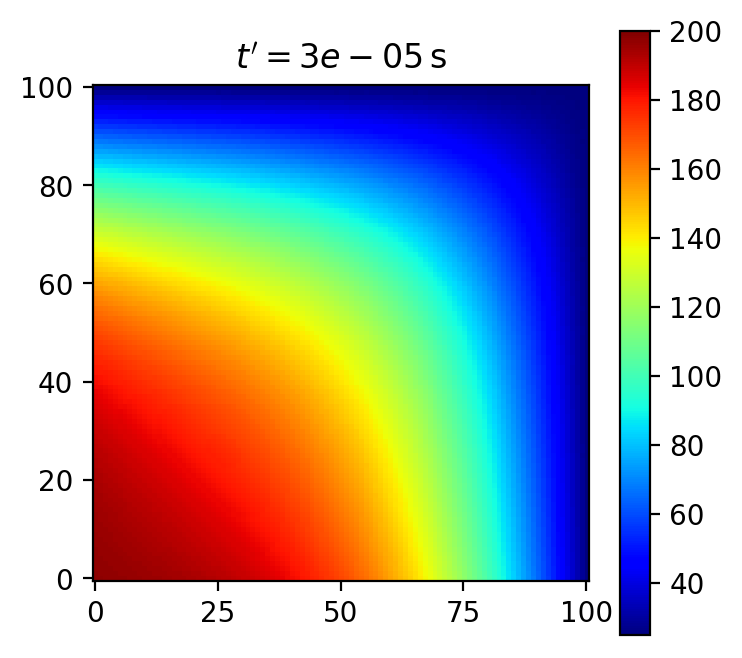

In [18]:
for p in np.linspace(0, 1, 30):
    plt.close()
    interactivePlot(p)
    plt.savefig("heat-2-stages/stage2/" + "%d"%(p * 30), format="png")

![](heat-2-stages/stage2/animated.gif)

### 一段热传导

开始时整块片子$200 \,{}^\circ$，上右两边无限热源，维持$25 \,{}^\circ$，维持一段时间。

In [4]:
# X = np.linspace(0, 100e-6, 101)
# Y = np.linspace(0, 100e-6, 101)

# X, Y = np.meshgrid(X, Y)
la = 10e-3 # axis 0 physical length
lb = 10e-3 # axis 1 physical length
lc = 1e-3 # axis 2 physical length
t0 = 0 # initial time
t1 = 3e-4 # endpoint time

def f(t, y):
    y = y.reshape(101, 101)
#     y[0, :] = 25
    y[-1, :] = 25
#     y[:, 0] = 25
    y[:, -1] = 25
#     y[0, 0] = 200
    df_dx, df_dy = np.gradient(y, la / 101)
    d2f_dx2 = np.gradient(df_dx, la / 101, axis=0)
    d2f_dy2 = np.gradient(df_dy, la / 101, axis=1)
    return (0.18 * (d2f_dx2 + d2f_dy2)).flatten()

y0 = np.ones((101, 101)) * 200
# y0[0, :] = 25
# y0[-1, :] = 25
# y0[:, 0] = 25
# y0[:, -1] = 25
# y0[0, 0] = 200
y0 = y0.flatten()

sol3 = scipy.integrate.solve_ivp(f, [t0, t1], y0, dense_output=True, method="RK23")
# sol1 = scipy.integrate.solve_ivp(f, [0, 3e-6], y0, t_eval=np.linspace(0, 3e-6, 100), dense_output=True, method="RK23")
# sol = scipy.integrate.solve_ivp(f, [0, 1e-5], y0, dense_output=True)
sol3

  message: 'The solver successfully reached the interval end.'
     nfev: 17177
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f495da8cfd0>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.64210210e-08, 5.79802715e-08, ...,
       2.99903684e-04, 2.99973700e-04, 3.00000000e-04])
 t_events: None
        y: array([[200.        , 200.        , 200.        , ...,  43.73662342,
         43.72467418,  43.72023604],
       [200.        , 200.        , 200.        , ...,  43.73662341,
         43.72467418,  43.72023604],
       [200.        , 200.        , 200.        , ...,  43.7273141 ,
         43.71550582,  43.71102397],
       ...,
       [ 25.        ,  25.        ,  25.        , ...,  25.        ,
         25.        ,  25.        ],
       [ 25.        ,  25.        ,  25.        , ...,  25.        ,
         25.        ,  25.        ],
       [ 25.        ,  25.        ,  25.        , ...,  25.        ,
         25.        , 

In [5]:
def interactivePlot(p):
    plt.imshow(sol3.sol(p * t1).reshape(101, 101), origin="lower", cmap="jet")
    plt.clim(25, 200)
    plt.title(r"$t = %g \,{\rm s}$"%(p * t1))
    plt.colorbar()

# values = np.linspace(0, 1, 1000)
slider = widgets.FloatSlider(min=0, max=1, step=1 / 1000, continuous_update=False)
widgets.interact(interactivePlot, p = slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='p', max=1.0, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

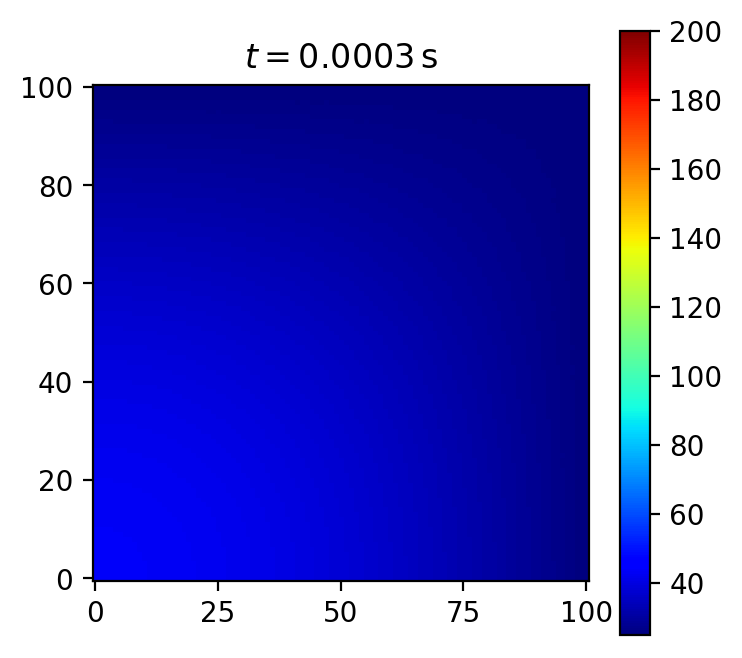

In [7]:
for p in np.linspace(0, 1, 30):
    plt.close()
    interactivePlot(p)
    plt.savefig("heat-200-everywhere/" + "%d"%(p * 30), format="png")

![](heat-200-everywhere/animated.gif)

## 三维传热

### 一段传热

开启了`dense_output`之后，用插值可以非常精确地解出时间范围内任何一个时间点的温度场，而且速度很快，大概10s。缺点是非常非常占内存。`0 - 3e-6 s`需要占用大概2.35 GiB内存。

In [4]:
# X = np.linspace(0, 100e-6, 101)
# Y = np.linspace(0, 100e-6, 101)

# X, Y = np.meshgrid(X, Y)
la = 10e-3 # axis 0 physical length
lb = 10e-3 # axis 1 physical length
lc = 1e-3 # axis 2 physical length
t0 = 0 # initial time
t1 = 3e-6 # endpoint time

def f(t, y):
    y = y.reshape(101, 101, 11)
#     y[0, :] = 25
    y[-1, :, -1] = 25
#     y[:, 0] = 25
    y[:, -1, -1] = 25
#     y[0, 0] = 200
    df_dx, df_dy, df_dz = np.gradient(y, la / 101)
    d2f_dx2 = np.gradient(df_dx, la / 101, axis=0)
    d2f_dy2 = np.gradient(df_dy, la / 101, axis=1)
    d2f_dz2 = np.gradient(df_dz, la / 101, axis=2)
    return (0.18 * (d2f_dx2 + d2f_dy2 + d2f_dz2)).flatten()

y0 = np.ones((101, 101, 11)) * 200
# y0[0, :] = 25
# y0[-1, :] = 25
# y0[:, 0] = 25
# y0[:, -1] = 25
# y0[0, 0] = 200
y0 = y0.flatten()

sol4 = scipy.integrate.solve_ivp(f, [t0, t1], y0, dense_output=True, method="RK23")
# sol1 = scipy.integrate.solve_ivp(f, [0, 3e-6], y0, t_eval=np.linspace(0, 3e-6, 100), dense_output=True, method="RK23")
# sol = scipy.integrate.solve_ivp(f, [0, 1e-5], y0, dense_output=True)
sol4

  message: 'The solver successfully reached the interval end.'
     nfev: 242
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f91f10300b8>
   status: 0
  success: True
        t: array([0.00000000e+00, 3.23001994e-08, 6.53247089e-08, 1.03108255e-07,
       1.49049220e-07, 2.13628478e-07, 2.92062322e-07, 3.77183967e-07,
       4.78728540e-07, 5.48661912e-07, 6.35369474e-07, 6.94076992e-07,
       7.65334707e-07, 8.08138137e-07, 8.63187001e-07, 9.09622350e-07,
       9.60832965e-07, 1.01204358e-06, 1.05435460e-06, 1.10132249e-06,
       1.15403289e-06, 1.19855191e-06, 1.24726804e-06, 1.29830593e-06,
       1.34248631e-06, 1.39024970e-06, 1.44107725e-06, 1.48597199e-06,
       1.53397102e-06, 1.58412599e-06, 1.62921568e-06, 1.67697603e-06,
       1.72676695e-06, 1.77655786e-06, 1.81925431e-06, 1.86572855e-06,
       1.91730689e-06, 1.96234699e-06, 2.01078257e-06, 2.06083351e-06,
       2.10539410e-06, 2.15285898e-06, 2.20287130e-06, 2.25288362e-0

In [5]:
def interactivePlot(p):
    plt.imshow(sol4.sol(p * t1).reshape(101, 101, 11)[:, :, -1], origin="lower", cmap="jet")
    plt.clim(25, 200)
    plt.title(r"$t = %g \,{\rm s}$"%(p * t1))
    plt.colorbar()
    
    plt.figure()
    plt.imshow(sol4.sol(p * t1).reshape(101, 101, 11)[0, :, :], origin="lower", cmap="jet")
    plt.clim(25, 200)
    plt.title(r"$t = %g \,{\rm s}$"%(p * t1))
    plt.colorbar()
    

# values = np.linspace(0, 1, 1000)
slider = widgets.FloatSlider(min=0, max=1, step=1 / 1000, continuous_update=False)
widgets.interact(interactivePlot, p = slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='p', max=1.0, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

In [5]:
def interactivePlot(p):
    plt.close()
    
    data = sol4.sol(p * t1).reshape(101, 101, 11)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca(projection="3d")
    ax.set_title(r"$t = %g \,{\rm s}$"%(p * t1))
    
    # top surface
    X = np.linspace(0, la, 101)
    Y = np.linspace(0, lb, 101)
    X, Y = np.meshgrid(X, Y)
    norm = mpl.colors.Normalize(vmin=25, vmax=200)
    
    surface = ax.plot_surface(X, Y, lc * np.ones((101, 101)), facecolors=plt.cm.jet(norm(data[:, :, -1])), shade=False)
    
    # bottom surface
    surface = ax.plot_surface(X, Y, np.zeros((101, 101)), facecolors=plt.cm.jet(norm(data[:, :, 0])), shade=False)
    
    X = np.linspace(0, lc, 11)
    Y = np.linspace(0, la, 101)
    X, Y = np.meshgrid(X, Y)
    # 
    surface = ax.plot_surface(0, Y, X, facecolors=plt.cm.jet(norm(data[0, :, :])), shade=False)
    
    #
    surface = ax.plot_surface(Y, 0, X, facecolors=plt.cm.jet(norm(data[:, 0, :])), shade=False)
    
    #
    surface = ax.plot_surface(la, Y, X, facecolors=plt.cm.jet(norm(data[-1, :, :])), shade=False)
    
    #
    surface = ax.plot_surface(Y, lb, X, facecolors=plt.cm.jet(norm(data[:, -1, :])), shade=False)
#     fig.colorbar(surface)

#     ax.grid()
    ax.set_xlim(0, la)
    ax.set_ylim(0, lb)
    ax.set_zlim(0, lc)
#     ax.set_aspect("equal", "datalim")
#     fig.tight_layout()
#     plt.colorbar(data)

# values = np.linspace(0, 1, 1000)
slider = widgets.FloatSlider(min=0, max=1, step=1 / 1000, continuous_update=False)
widgets.interact(interactivePlot, p = slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='p', max=1.0, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

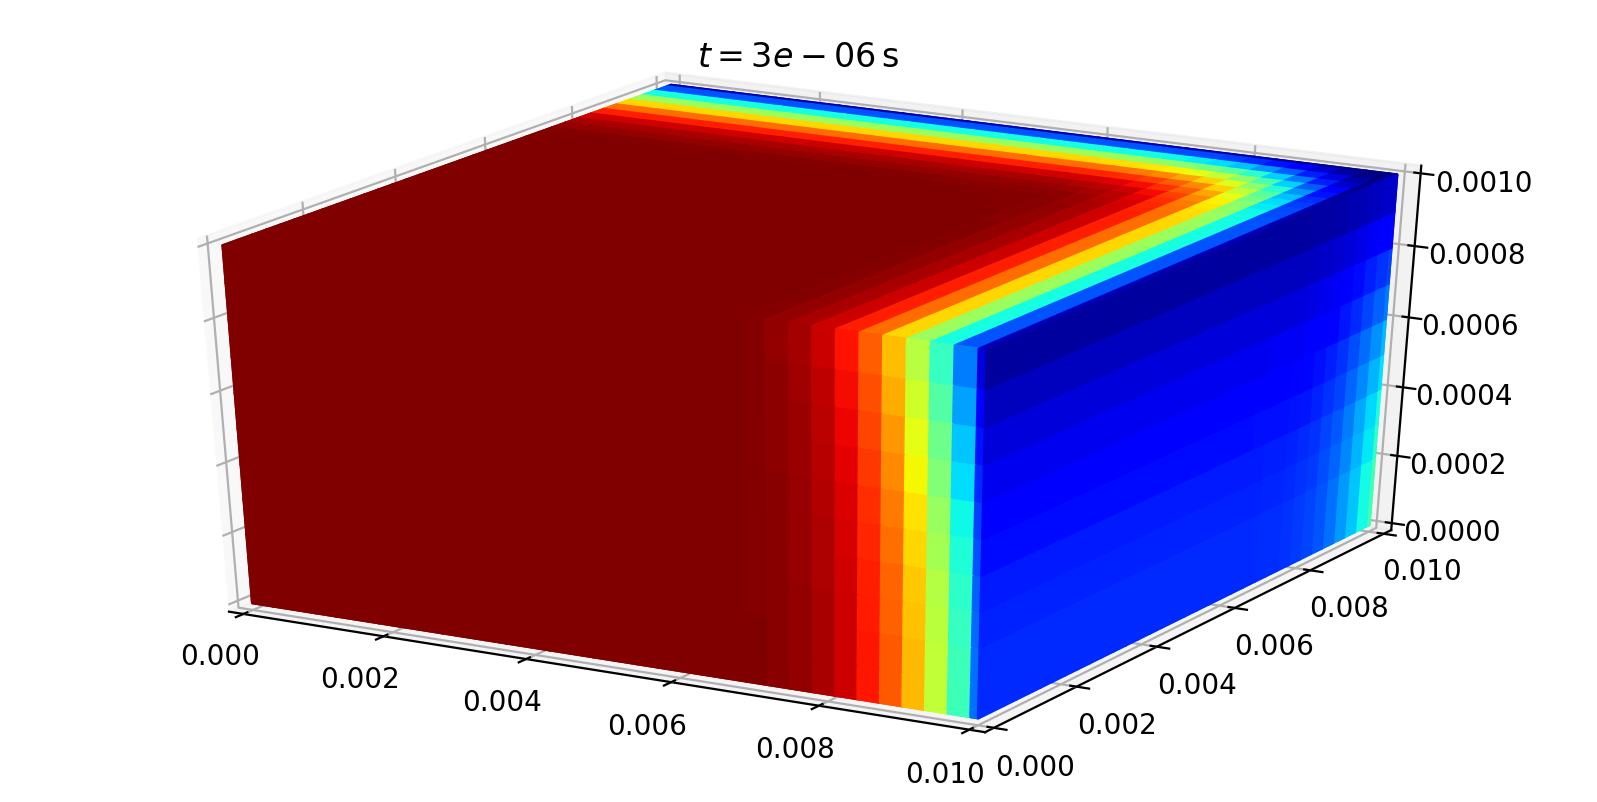

In [6]:
for p in np.linspace(0, 1, 30):
    plt.close()
    interactivePlot(p)
    plt.savefig("heat-3d-200-everywhere/" + "%d"%(p * 30), format="png")

![](heat-3d-200-everywhere/animated.gif)

-----

如果不开`dense_output`，几乎不占用内存。但是运算时间非常长，`0 - 3e-5 s`大概需要4 min。

测试发现`scipy`会自动利用双核。

In [7]:
# X = np.linspace(0, 100e-6, 101)
# Y = np.linspace(0, 100e-6, 101)

# X, Y = np.meshgrid(X, Y)

def f(t, y):
    y = y.reshape(101, 101, 11)
#     y[0, :] = 25
    y[-1, :, -1] = 25
#     y[:, 0] = 25
    y[:, -1, -1] = 25
#     y[0, 0] = 200
    df_dx, df_dy, df_dz = np.gradient(y, 100e-6 / 101)
    d2f_dx2 = np.gradient(df_dx, 100e-6 / 101, axis=0)
    d2f_dy2 = np.gradient(df_dy, 100e-6 / 101, axis=1)
    d2f_dz2 = np.gradient(df_dz, 100e-6 / 101, axis=2)
    return (1e-4 * (d2f_dx2 + d2f_dy2 + d2f_dz2)).flatten()

y0 = np.ones((101, 101, 11)) * 200
# y0[0, :] = 25
# y0[-1, :] = 25
# y0[:, 0] = 25
# y0[:, -1] = 25
# y0[0, 0] = 200
y0 = y0.flatten()

sol4 = scipy.integrate.solve_ivp(f, [0, 3e-5], y0, t_eval=np.linspace(0, 3e-5, 100))
# sol1 = scipy.integrate.solve_ivp(f, [0, 3e-6], y0, t_eval=np.linspace(0, 3e-6, 100), dense_output=True, method="RK23")
# sol = scipy.integrate.solve_ivp(f, [0, 1e-5], y0, dense_output=True)
sol4

  message: 'The solver successfully reached the interval end.'
     nfev: 20054
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.03030303e-07, 6.06060606e-07, 9.09090909e-07,
       1.21212121e-06, 1.51515152e-06, 1.81818182e-06, 2.12121212e-06,
       2.42424242e-06, 2.72727273e-06, 3.03030303e-06, 3.33333333e-06,
       3.63636364e-06, 3.93939394e-06, 4.24242424e-06, 4.54545455e-06,
       4.84848485e-06, 5.15151515e-06, 5.45454545e-06, 5.75757576e-06,
       6.06060606e-06, 6.36363636e-06, 6.66666667e-06, 6.96969697e-06,
       7.27272727e-06, 7.57575758e-06, 7.87878788e-06, 8.18181818e-06,
       8.48484848e-06, 8.78787879e-06, 9.09090909e-06, 9.39393939e-06,
       9.69696970e-06, 1.00000000e-05, 1.03030303e-05, 1.06060606e-05,
       1.09090909e-05, 1.12121212e-05, 1.15151515e-05, 1.18181818e-05,
       1.21212121e-05, 1.24242424e-05, 1.27272727e-05, 1.30303030e-05,
       1.33333333e-05, 1.36363636e-05, 1.39393939e-05, 1.

In [8]:
def interactivePlot(n):
    plt.close()
    
    data = sol4.y[:, n].reshape(101, 101, 11)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca(projection="3d")
    ax.set_title(r"$t = %g \,{\rm s}$"%(sol4.t[n]))
    
    # top surface
    X = np.linspace(0, 100e-6, 101)
    Y = np.linspace(0, 100e-6, 101)
    X, Y = np.meshgrid(X, Y)
    norm = mpl.colors.Normalize(vmin=25, vmax=200)
    
    surface = ax.plot_surface(X, Y, 10e-6 * np.ones((101, 101)), facecolors=plt.cm.jet(norm(data[:, :, -1])), shade=False)
    
    # bottom surface
    surface = ax.plot_surface(X, Y, np.zeros((101, 101)), facecolors=plt.cm.jet(norm(data[:, :, 0])), shade=False)
    
    X = np.linspace(0, 10e-6, 11)
    Y = np.linspace(0, 100e-6, 101)
    X, Y = np.meshgrid(X, Y)
    # 
    surface = ax.plot_surface(0, Y, X, facecolors=plt.cm.jet(norm(data[0, :, :])), shade=False)
    
    #
    surface = ax.plot_surface(Y, 0, X, facecolors=plt.cm.jet(norm(data[:, 0, :])), shade=False)
    
    #
    surface = ax.plot_surface(100e-6, Y, X, facecolors=plt.cm.jet(norm(data[-1, :, :])), shade=False)
    
    #
    surface = ax.plot_surface(Y, 100e-6, X, facecolors=plt.cm.jet(norm(data[:, -1, :])), shade=False)
#     fig.colorbar(surface)

#     ax.grid()
    ax.set_xlim(0, 100e-6)
    ax.set_ylim(0, 100e-6)
    ax.set_zlim(0, 10e-6)
#     ax.set_aspect("equal", "datalim")
#     fig.tight_layout()
#     plt.colorbar(data)

# values = np.linspace(0, 1, 1000)
slider = widgets.IntSlider(min=0, max=99, step=1, continuous_update=False)
widgets.interact(interactivePlot, n = slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='n', max=99), Output()), _dom_classes=('widget-interact',))

<function __main__.interactivePlot>

In [9]:
sol4.y.tofile("heat-3d-200-everywhere-2.numpy")

In [14]:
for t in range(0, 100, 3):
    interactivePlot(t)
    plt.savefig("heat-3d-200-everywhere2/" + "%d"%(t / 3), format="png")
    plt.close("all")

![](heat-3d-200-everywhere2/animated.gif)

In [22]:
X = np.fromfile("heat-3d-200-everywhere-2.numpy")
X.reshape(-1, 100)

array([[200.        , 200.        , 200.        , ...,  16.50967302,
         15.68964218,  14.89433591],
       [200.        , 200.        , 200.        , ...,  16.50967344,
         15.68964261,  14.89433635],
       [200.        , 200.        , 200.        , ...,  16.45554151,
         15.63600984,  14.8412753 ],
       ...,
       [200.        ,  64.10840698,  44.85803805, ...,  24.99951761,
         24.99949014,  24.99949188],
       [200.        ,  44.81637189,  35.05709837, ...,  24.99968842,
         24.9997529 ,  24.99977468],
       [ 25.        ,  24.96419755,  24.95676176, ...,  24.99995578,
         24.99997981,  25.00003803]])

## 1d heat equation

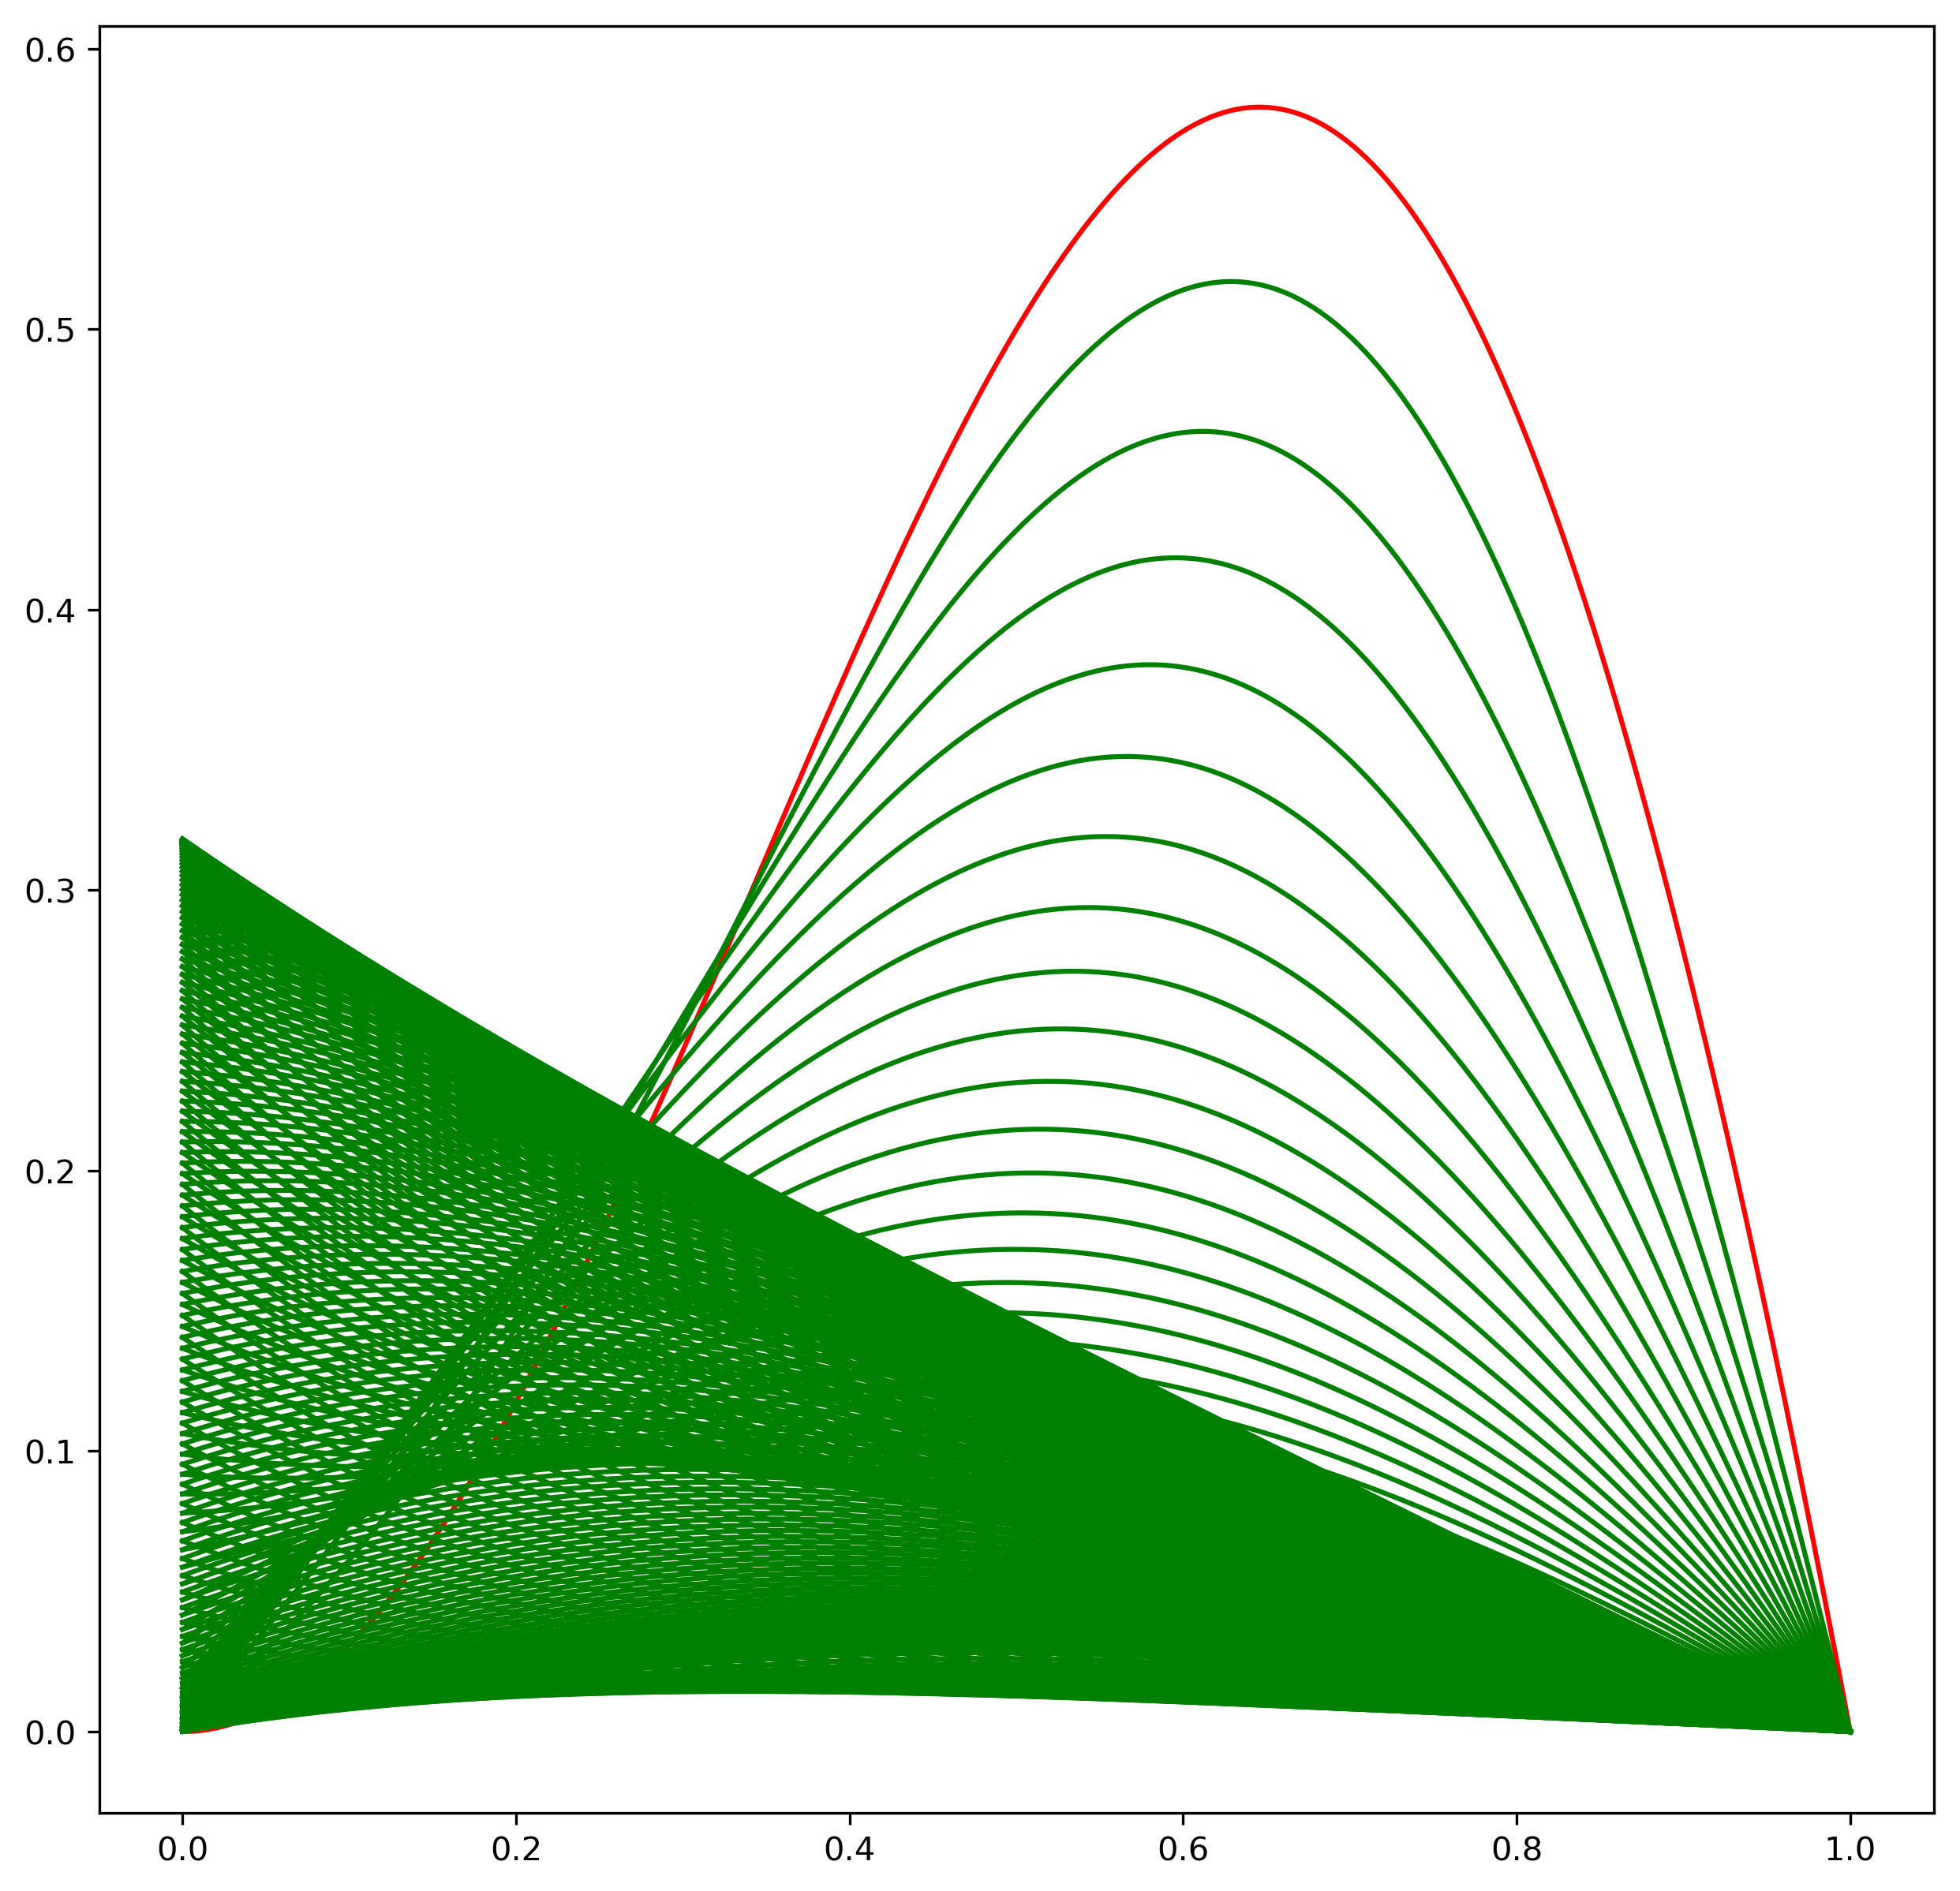

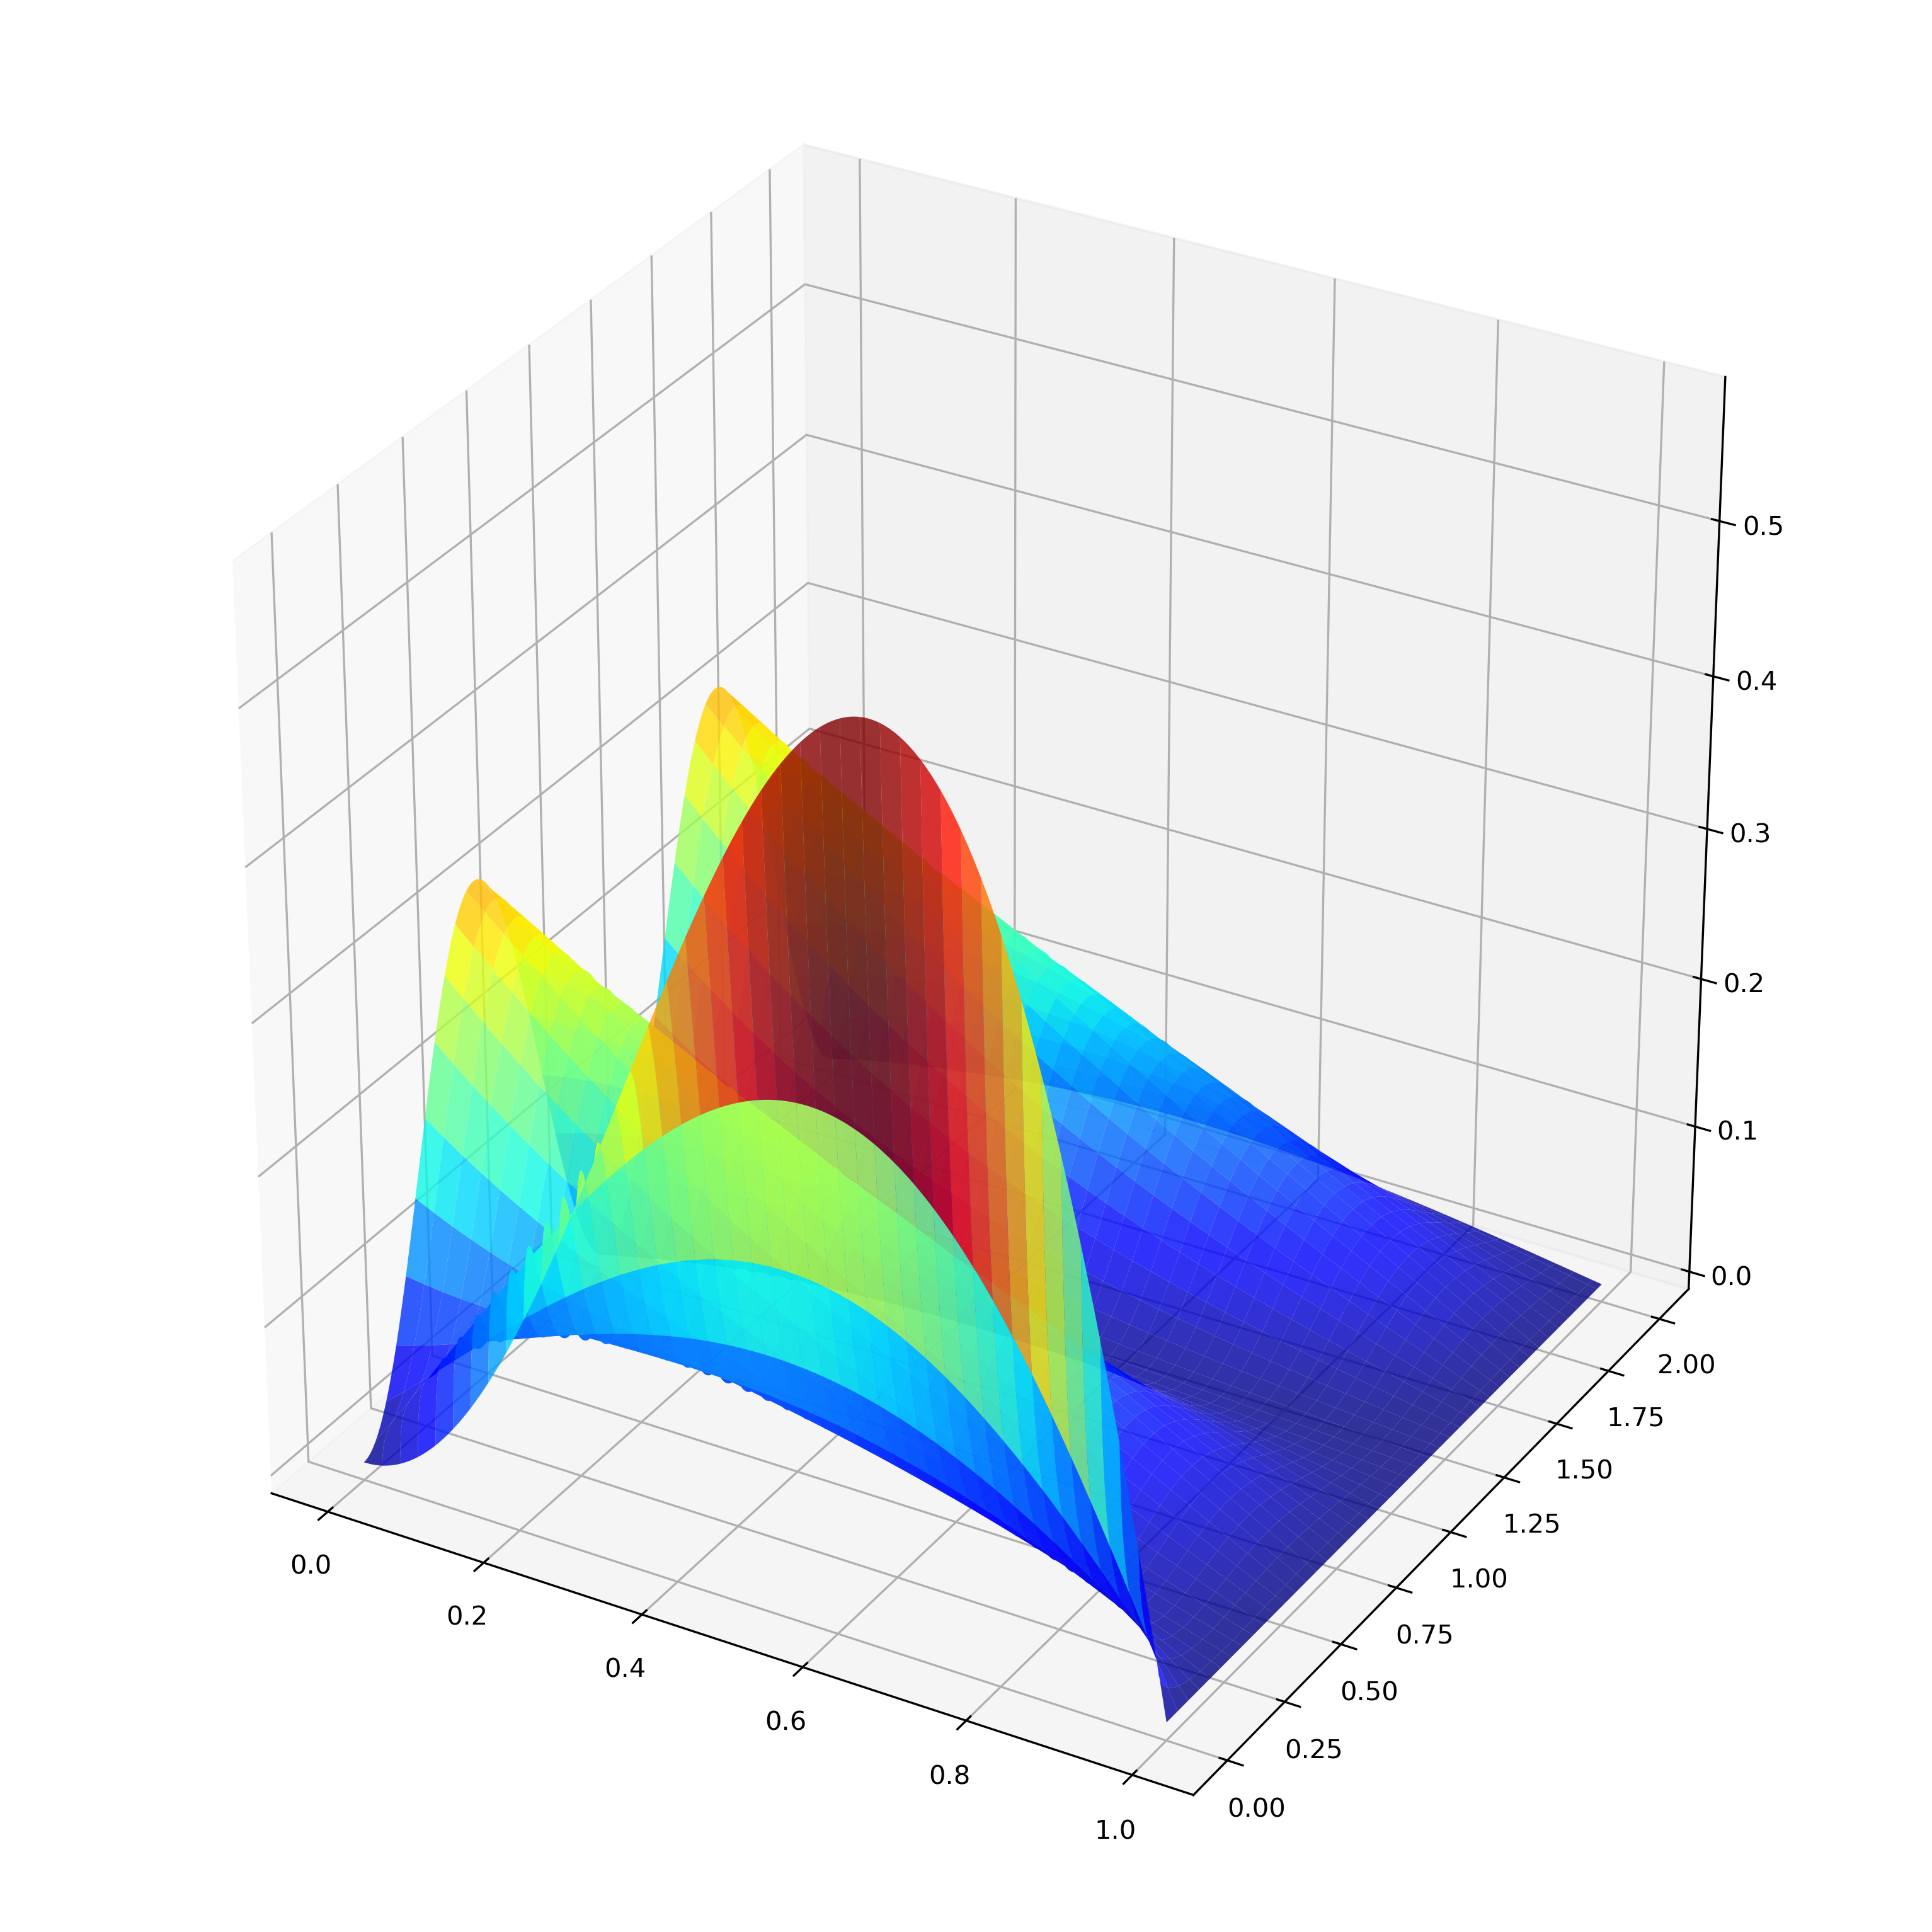

In [3]:
# solve the one dimensional heat equation on a domain
# using a semidiscrete method.
#
# Dale Roberts <dale.o.roberts@gmail.com>

import numpy as np
from numpy import pi, cos, sin

# space and time mesh

x, h = np.linspace(0.0, 1.0, 256, retstep=True)
t, p = np.linspace(0.0, 2.0, 256, retstep=True)

# initial condition

u0 = x*sin(pi*x)

# Laplacian

n = x.shape[0]

A = np.zeros((n,n))
A.flat[::(n+1)] = -2.0/h**2
A.flat[1::(n+1)] = A.flat[n::(n+1)] = 1.0/h**2

# setup U'(t) + F(U(t)) = 0

def F(u,s):
    w = np.dot(A,u)
    # set boundary conditions
    w[0] = sin(2*pi*s)
    w[-1] = 0.0
    return w

# solve system of ODEs

import scipy.integrate as integrators

U = integrators.odeint(F,u0,t)

# 2d plot for matrix U

import pylab

pylab.plot(x,U[0],'r')
for i in range(1, U.shape[0]):
    pylab.plot(x,U[i],'g')

# 3d plot where x and t are vectors containing the time and space points

x, h = np.linspace(0.0, 1.0, 256, retstep=True)
t, p = np.linspace(0.0, 2.0, 256, retstep=True)

xm, tm = np.meshgrid(x, t)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Axes3D(pylab.figure()).plot_surface(xm, tm, U, cmap=cm.jet, alpha=0.8)

plt.show()